<a href="https://colab.research.google.com/github/HssahSaad/T5_Week4/blob/main/Week(4)_Ensemble_Task_Hssah_Alsherihi.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Ensemble Methods Notebook
Welcome to the weekly project on Ensemble Methods. You will be working with a dataset of traffic jams.

## Dataset
The dataset that will be used in this task is `Traffic_Jam.csv`

## Instructions
- Follow the steps outlined below.
- Write your code in the empty code cells.
- Comment on your code to explain your reasoning.

## Dataset Overview
This dataset contains traffic data including various counts of vehicle types across different times and days. Below are samples of these columns:

* `Time`: The timestamp of the traffic count (in intervals).
* `Date`: The day of the month the data was recorded.
* `Day of the Week`: The day of the week for the recorded data.
* `CarCount`: The number of cars counted during the time interval.
* `BikeCount`: The number of bikes counted during the time interval.
* `BusCount`: The number of buses counted during the time interval.
* `TruckCount`: The number of trucks counted during the time interval.
* `Total`: Total vehicles counted during the time interval.
* `Traffic Situation`: Qualitative assessment of the traffic (e.g., normal, congested).

## Goal
The primary goal of this exam is to develop a predictive model capable of determining the `Traffic Situation` based on your choice of features provided in the dataset. Students are expected to apply ensemble methods to build and evaluate their models.

# Import Libraries

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# Load the dataset


In [2]:
df = pd.read_csv('Traffic_Jams.csv')
df.head()

,Time,Date,Day of the week,CarCount,BikeCount,BusCount,TruckCount,Total,Traffic Situation
0,12:00:00 AM,10,Tuesday,13,2,2,24,41,normal
1,12:15:00 AM,10,Tuesday,14,1,1,36,52,normal
2,12:30:00 AM,10,Tuesday,10,2,2,32,46,normal
3,12:45:00 AM,10,Tuesday,10,2,2,36,50,normal
4,1:00:00 AM,10,Tuesday,11,2,1,34,48,normal


# Exploratory Data Analysis (EDA)

Below are some steps and visualizations to perform EDA on the dataset:

1. **Summary Statistics**: Obtain summary statistics for the dataset to understand the central tendencies and dispersion of numerical features.describe()

2. **Distribution of the Target Variable**: Analyze the distribution of the target variable `Traffic Situation` to understand the class balance.

3. **Correlation Analysis**: Analyze correlations between features.

### Summary Statistics

In [3]:
df.describe()

,Date,CarCount,BikeCount,BusCount,TruckCount,Total
count,6324.000000,6324.000000,6324.000000,6324.000000,6324.000000,6324.000000
mean,16.043327,64.355629,12.013283,12.557875,18.658128,107.584915
std,8.956907,44.307088,11.363955,12.319831,10.724822,55.850784
min,1.000000,5.000000,0.000000,0.000000,0.000000,21.000000
25%,8.000000,18.000000,3.000000,1.000000,10.000000,53.000000
50%,16.000000,61.000000,9.000000,10.000000,18.000000,103.000000
75%,24.000000,101.250000,19.000000,20.000000,27.000000,151.000000
max,31.000000,180.000000,70.000000,50.000000,60.000000,279.000000


### Distribution of the Target Variable

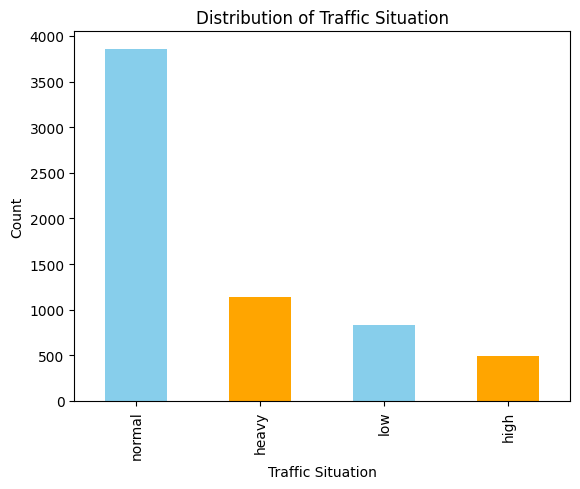

In [4]:
# Visualizing the distribution

df['Traffic Situation'].value_counts().plot(kind='bar', color=['skyblue', 'orange'])
plt.title('Distribution of Traffic Situation')
plt.xlabel('Traffic Situation')
plt.ylabel('Count')
plt.show()

# Note:

### there is an imbalance in the data. The "normal" traffic situation category has a significantly higher count compared to the other categories

### Correlation Analysis

In [5]:
# Correlation Matrix
numeric_df = df.select_dtypes(include=['number'])
Correlation_Matrix = numeric_df.corr()

# Preprocess the data (if necessary)

Before building models, it's crucial to preprocess the data to ensure it's clean and suitable for training. Follow these steps to prepare the dataset:

1. **Check for Missing Values**: Determine if there are any missing values in the dataset and handle them appropriately. You can choose to fill them with a mean, median, or mode value, or drop rows with missing values if necessary.

2. **Encode Categorical Variables**: Convert categorical variables into numerical representations. This can be done using techniques such as one-hot encoding and lable-encoder.

3. **Feature Scaling**: Standardize or Normalize numerical features if needed to have a consistent scale.

4. **Remove Unnecessary Columns**: Drop any columns that are not relevant for modeling.

### 1. Check for missing values

In [6]:
df.isnull().sum()

,0
Time,0
Date,0
Day of the week,0
CarCount,0
BikeCount,0
BusCount,0
TruckCount,0
Total,0
Traffic Situation,0


###  2. Encode Categorical Variable
**will do it after splitting the dataset**

###  3.Feature Scaling
**will do it after splitting the dataset**

### Remove Unnecessary Columns

**there is no unnecessary colums**

# Visualize the Data

Visualizing the data helps in understanding the relationships between features and the target variable. Below are some common visualizations that can be used to gain insights into the dataset:

1. **Count Plots for Categorical Features**: Use count plots to visualize the frequency of categorical features such as the `Traffic Situation`.

2. **Correlation Heatmap**: Create a heatmap to visualize the correlation between numerical features and identify any strong relationships.

### Count Plots for Categorical Features

<ipython-input-7-7350c2a09a93>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Traffic Situation', data=df, palette='Set1')


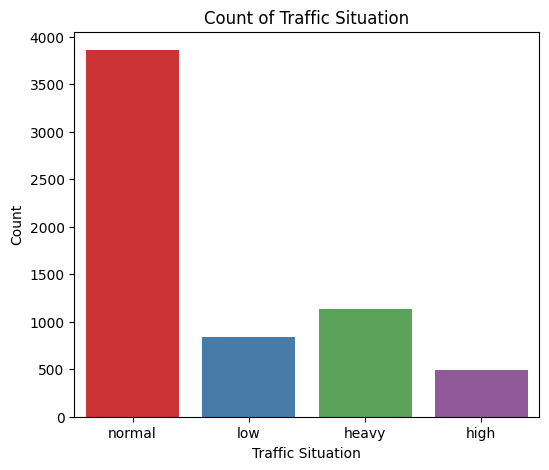

In [7]:
# Count plot for Traffic Situation
plt.figure(figsize=(6, 5))
sns.countplot(x='Traffic Situation', data=df, palette='Set1')
plt.title('Count of Traffic Situation')
plt.xlabel('Traffic Situation')
plt.ylabel('Count')
plt.show()

### There is an imbalance in the data. The "normal" traffic situation category has a significantly higher count compared to the other categories

<ipython-input-8-90a72ad3fb46>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Day of the week', data=df, palette='Set1')
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 9 (	) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


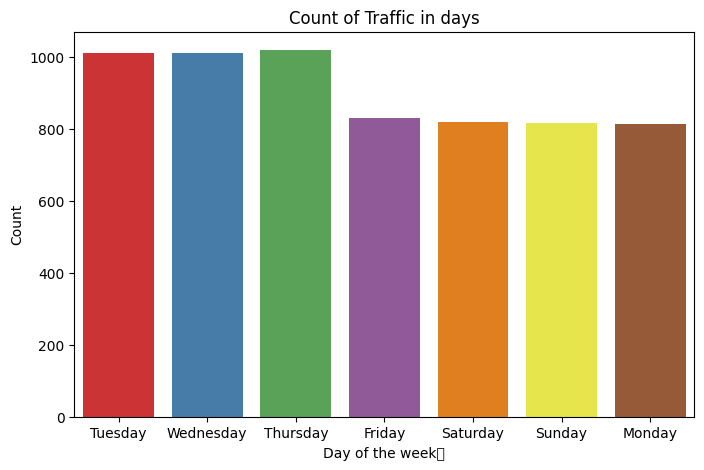

In [8]:
# Count plot for Traffic in days
plt.figure(figsize=(8, 5))
sns.countplot(x='Day of the week', data=df, palette='Set1')
plt.title('Count of Traffic in days')
plt.xlabel('Day of the week	')
plt.ylabel('Count')
plt.show()

### Traffic counts are consistent across the week with a slight dip on weekends.

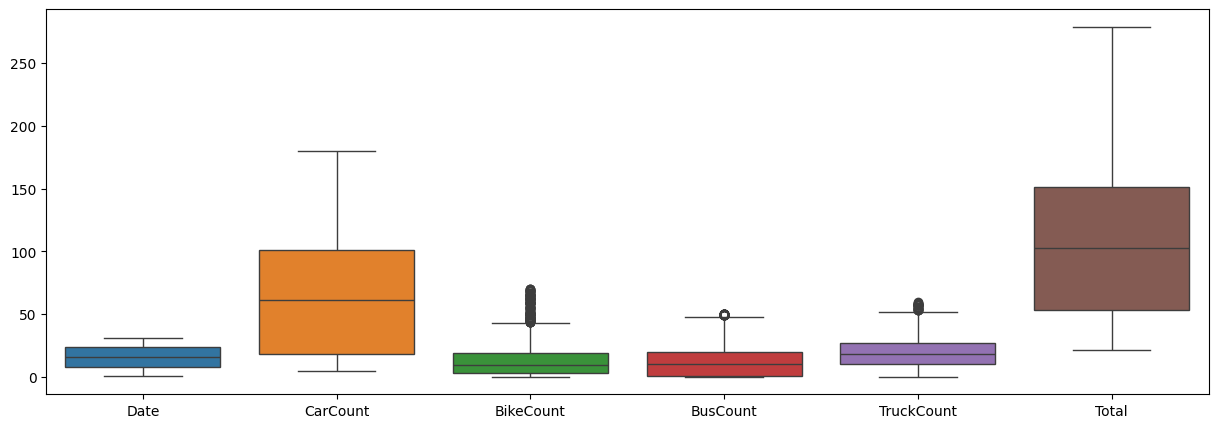

In [9]:
# Identify outliers with boxplot
plt.figure(figsize=(15, 5))
sns.boxplot(df)
plt.show()

### based on the bot plot there are some outliers in the dataset

In [10]:
# Function to remove outliers based on the IQR method

def remove_outliers_iqr(df):

    for col in df.select_dtypes(include=['float64', 'int64']).columns:
        Q1 = df[col].quantile(0.25)
        Q3 = df[col].quantile(0.75)
        IQR = Q3 - Q1

        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR

        df = df[(df[col] >= lower_bound) & (df[col] <= upper_bound)]

    return df


# Remove outliers
df_no_outliers = remove_outliers_iqr(df)

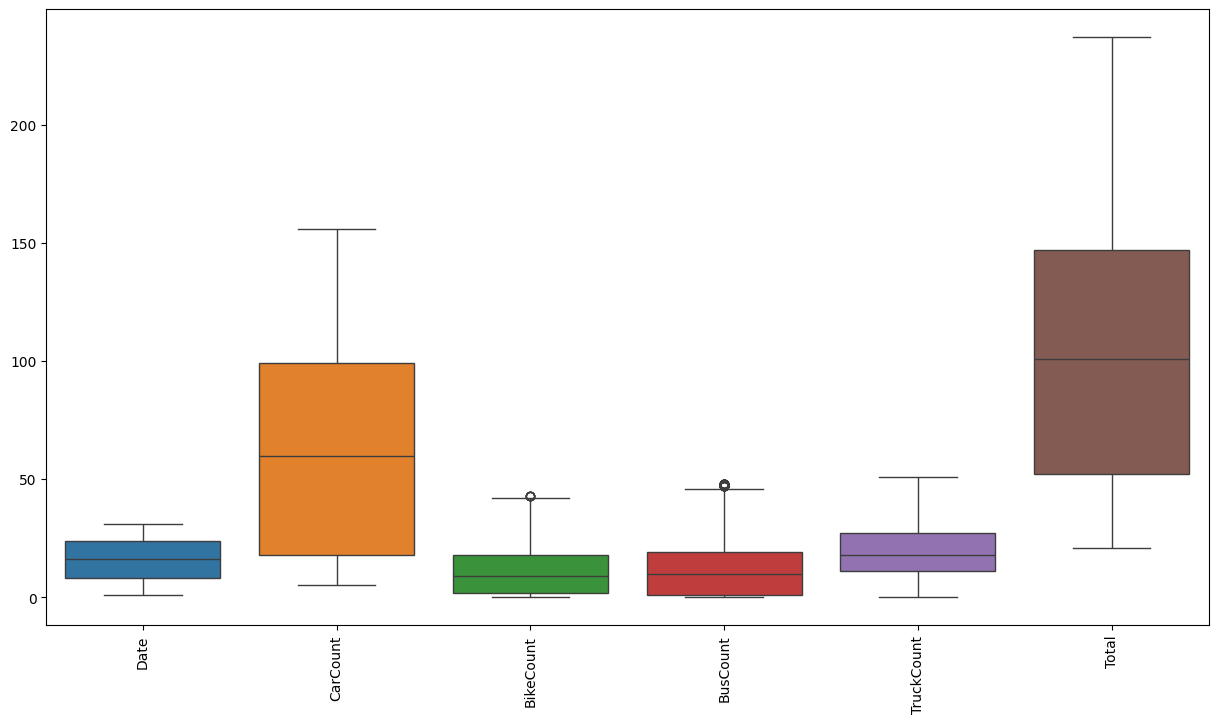

In [11]:
# if outliers were removed by plotting again
plt.figure(figsize=(15,8))
sns.boxplot(data=df_no_outliers)
plt.xticks(rotation=90)
plt.show()


### Correlation Heatmap

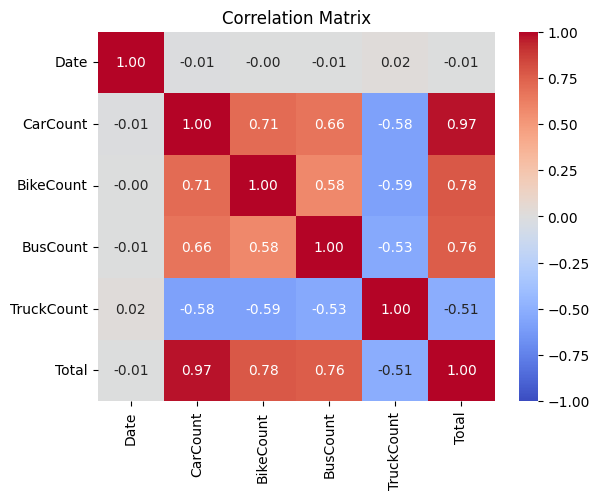

In [12]:
# Visualize it with Heatmap
sns.heatmap(Correlation_Matrix, annot=True, fmt=".2f", cmap='coolwarm', vmin=-1, vmax=1)
plt.title('Correlation Matrix')
plt.show()

###  the strongest relationships appear to be between CarCount and Total

# Split the Dataset

1. **Define Features and Target**: Separate the dataset into features (`X`) and the target variable (`y`).

2. **Train-Test Split**: Use the `train_test_split` function from `sklearn.model_selection` to split the data.

### Define Features and Targe

In [13]:
X = df_no_outliers.drop(columns = 'Traffic Situation', axis = 1)
y = df_no_outliers['Traffic Situation']

### Convert 'Time' column to seconds since midnight

In [14]:
def convert_time_to_seconds(df_no_outliers, time_column):
    df_no_outliers[time_column] = pd.to_datetime(df_no_outliers[time_column]).dt.hour * 3600 + \
                      pd.to_datetime(df_no_outliers[time_column]).dt.minute * 60 + \
                      pd.to_datetime(df_no_outliers[time_column]).dt.second
    return df_no_outliers

In [15]:
X = convert_time_to_seconds(X, 'Time')

<ipython-input-14-56e2f571d8fb>:2: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df_no_outliers[time_column] = pd.to_datetime(df_no_outliers[time_column]).dt.hour * 3600 + \
<ipython-input-14-56e2f571d8fb>:3: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  pd.to_datetime(df_no_outliers[time_column]).dt.minute * 60 + \
<ipython-input-14-56e2f571d8fb>:4: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  pd.to_datetime(df_no_outliers[time_column]).dt.second


### Encode Categorical Variable

In [16]:
from sklearn.preprocessing import LabelEncoder

In [17]:
def encode_categorical(df_no_outliers, categorical_columns):
    label_encoders = {}
    for column in categorical_columns:
        le = LabelEncoder()
        df_no_outliers[column] = le.fit_transform(df_no_outliers[column])
        label_encoders[column] = le
    return df_no_outliers, label_encoders

In [18]:
# Step 3: Encode categorical variables
categorical_columns = ['Day of the week']
X, label_encoders = encode_categorical(X, categorical_columns)

### Feature Scaling

In [19]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

X_scaled_df = pd.DataFrame(X_scaled, columns=X.columns)

### Train-Test Split

In [20]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X_scaled_df , y , test_size = 0.2 , random_state=42)

# Initialize and Train the Classifiers

## Bagging
Chose the bagging model to go with and initialize and train a the model.

import necessary libraries

In [21]:
from sklearn.ensemble import RandomForestClassifier

In [22]:
random_forest_classifier = RandomForestClassifier(n_estimators=50, random_state=42)

random_forest_classifier.fit(X_train, y_train)

predictions = random_forest_classifier.predict(X_test)

### Evaluate the model performance

In [23]:
from sklearn.metrics import accuracy_score

In [24]:
# Evaluate the model's accuracy
accuracy = accuracy_score(y_test, predictions)
print(f'Random Forest Model Accuracy: {accuracy * 100:.2f}%')

Random Forest Model Accuracy: 88.61%


## Boosting
Chose the Boosting model to go with and initialize and train a the model.

#Train-Test Split

In [25]:
# Encode the target variable y
label_encoder = LabelEncoder()
y = label_encoder.fit_transform(y)

In [28]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X_scaled_df , y , test_size = 0.2 , random_state=42)

import necessary libraries

In [29]:
from xgboost import XGBClassifier

In [30]:
xgb_classifier = XGBClassifier(n_estimators=50, random_state=42)
xgb_classifier.fit(X_train, y_train)

predictions = xgb_classifier.predict(X_test)

### Evaluate the model performance

In [31]:
# Evaluate the model's accuracy
accuracy = accuracy_score(y_test, predictions)
print(f'XGBoost Classifier Model Accuracy: {accuracy * 100:.2f}%')

XGBoost Classifier Model Accuracy: 89.02%


## Stacking Classifier
Combine the previous classifiers as the base models using a Stacking Classifier.

### Import the libraries

In [32]:
from sklearn.ensemble import StackingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier

### Define meta-learner (LogisticRegression)

In [33]:
base_models = [
    ('decision_tree', DecisionTreeClassifier(random_state=42)),
    ('svc', SVC(probability=True, random_state=42)),
    ('knn', KNeighborsClassifier()),
    ('random_forest', RandomForestClassifier(random_state=42))
]

# the meta-model
meta_model = LogisticRegression()

### Initialize and Train the Stacking Classifier

Stacking combines multiple models (base learners) using a meta-learner. The meta-learner is trained on the predictions of the base learners to make the final prediction.

In [34]:
stacking_classifier = StackingClassifier(estimators=base_models, final_estimator=meta_model, cv=5)

stacking_classifier.fit(X_train, y_train)

predictions = stacking_classifier.predict(X_test)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


### Evaluate the model performance

In [35]:
# Evaluate the model's accuracy
accuracy = accuracy_score(y_test, predictions)
print(f'Stacking Classifier Model Accuracy: {accuracy * 100:.2f}%')

Stacking Classifier Model Accuracy: 89.83%


# Notebook Questions:

After completing the tasks in this notebook, take some time to reflect on the work you have done and answer the following questions. These questions are designed to help you think critically about the steps you took and the decisions you made.

* **Feature Selection and Engineering**
   - Which features did you find most important for predicting churn, and why do you think they are significant?
   - Did you perform any feature engineering? If so, what new features did you create, and how did they improve the model performance?

* **Model Selection**
   - Why did you choose the specific ensemble methods you implemented? What are the advantages of using ensemble methods over single models?
   - Compare the performance of different models you used. Which model performed the best, and what do you think contributed to its success?

* **Model Evaluation**
   - Which evaluation metrics did you use to assess the model performance, and why? What insights did these metrics provide about the models' strengths and weaknesses?


# Answer here:

The traffic situation was the most significant factor influencing the outcomes. However, I hadn't performed any feature engineering, because there was a good relationship between the variables.

I decided to use ensemble methods like Bagging with Random Forest, Boosting with XGBoost, and Stacking, which combined Decision Tree, SVC, KNN, and Random Forest models.

The Stacking model stood out with an accuracy of 89.83%, making it the best performer. XGBoost followed closely with 89.02%, and Random Forest achieved 88.61%. I used accuracy as the primary metric to evaluate the models, as it provided a clear understanding of how effectively each model predicted the traffic situation.